In [482]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [483]:
data=pd.read_csv("data.csv")

In [484]:
data.head(5)

,Place,Country,2022,2019,2020,2021,2023,2024,2025,2026
0,1,United States,24796.076,21372.600,20893.750,22939.580,25938.159,26980.364,28035.085,29102.501
1,2,China,18463.130,14340.600,14866.741,16862.979,19993.495,21594.809,23266.926,24996.040
2,3,Japan,5383.682,5135.896,5045.101,5103.110,5735.342,5958.651,6161.841,6344.454
3,4,Germany,4557.350,3888.756,3843.335,4230.172,4774.082,4985.991,5194.802,5406.142
4,5,United Kingdom,3442.205,2833.301,2709.678,3108.416,3582.338,3761.685,3959.370,4161.703


In [485]:
data.isna().sum()

Place      0
Country    0
2022       0
2019       0
2020       0
2021       0
2023       0
2024       0
2025       0
2026       0
dtype: int64

In [486]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Place    193 non-null    int64  
 1   Country  193 non-null    object 
 2   2022     193 non-null    float64
 3   2019     193 non-null    float64
 4   2020     193 non-null    float64
 5   2021     193 non-null    float64
 6   2023     193 non-null    float64
 7   2024     193 non-null    float64
 8   2025     193 non-null    float64
 9   2026     193 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 15.2+ KB


In [487]:
# Clear some useless columns
data.drop("Place",axis=1,inplace=True)
data.drop("Country",axis=1,inplace=True)
data.head(10)

,2022,2019,2020,2021,2023,2024,2025,2026
0,24796.076,21372.600,20893.750,22939.580,25938.159,26980.364,28035.085,29102.501
1,18463.130,14340.600,14866.741,16862.979,19993.495,21594.809,23266.926,24996.040
2,5383.682,5135.896,5045.101,5103.110,5735.342,5958.651,6161.841,6344.454
3,4557.350,3888.756,3843.335,4230.172,4774.082,4985.991,5194.802,5406.142
4,3442.205,2833.301,2709.678,3108.416,3582.338,3761.685,3959.370,4161.703
5,3250.078,2870.504,2660.244,2946.061,3515.188,3791.005,4084.694,4393.812
6,3140.031,2728.834,2624.416,2940.428,3281.714,3415.953,3543.562,3668.236
7,2272.269,2005.135,1884.935,2120.232,2369.654,2453.016,2537.659,2618.242
8,2189.786,1741.576,1644.037,2015.983,2306.066,2413.394,2520.113,2630.942
9,1907.661,1651.423,1638.258,1823.852,2012.100,2115.032,2217.588,2316.211


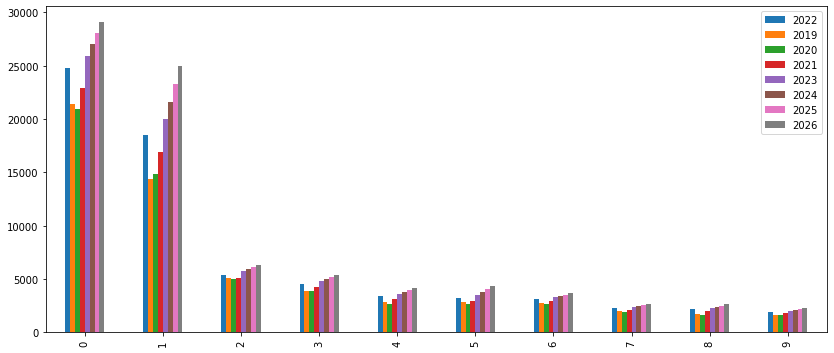

In [488]:
data.head(10).plot(kind="bar",figsize=(14,6));

In [489]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2022    193 non-null    float64
 1   2019    193 non-null    float64
 2   2020    193 non-null    float64
 3   2021    193 non-null    float64
 4   2023    193 non-null    float64
 5   2024    193 non-null    float64
 6   2025    193 non-null    float64
 7   2026    193 non-null    float64
dtypes: float64(8)
memory usage: 12.2 KB


In [490]:
# Test Train sets
data_test=data["2026"]
data_train=data.drop("2026",axis=1)


In [491]:
data_train.to_csv("train.csv"),data_test.to_csv("test.csv")

(None, None)

In [492]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data_train, data_test,test_size=0.2)

np.random.seed(42)
models={
 "Random Forest Classifier":RandomForestRegressor(),
 "Ridge":Ridge()
}

def fit_and_evaluate(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given ML models
    """
    np.random.seed(42)
    model_scores={}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
        best_model = max(model_scores, key=model_scores.get)        
    print("best model is : ", best_model)
    return model_scores

In [493]:
model_scores=fit_and_evaluate(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

best model is :  Ridge


{'Random Forest Classifier': 0.9964798878951752, 'Ridge': 0.9999952224731563}

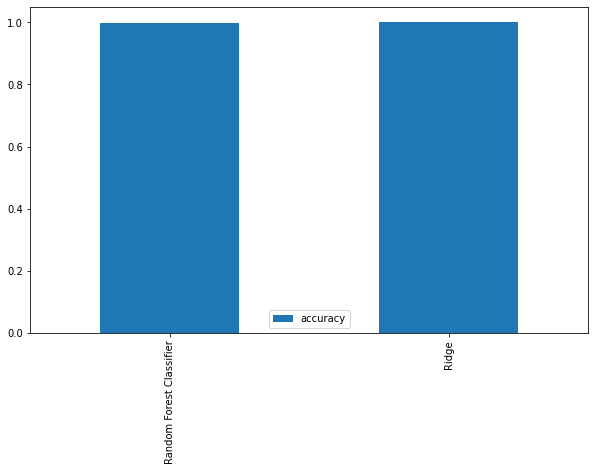

In [494]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot(kind="bar",figsize=(10,6));

In [499]:
model=Ridge(random_state=42)
model.fit(X_train, y_train)

Ridge(random_state=42)

In [500]:
y_preds=model.predict(X_test)
predictions=pd.DataFrame({"predictions for 2027 : ":y_preds})

In [511]:
# Comparasion
comparison=pd.DataFrame({"Actual Value :":y_test,"Predicted Value :":y_preds})
comparison.sort_index(axis=0,inplace=True)
comparison.head(10)


,Actual Value :,Predicted Value :
3,5406.142,5406.951361
6,3668.236,3673.176150
7,2618.242,2624.120043
9,2316.211,2324.668465
17,1290.764,1294.650963
20,1048.518,1045.575347
22,954.582,954.426707
24,736.648,738.249497
30,536.229,541.970112
42,438.120,438.554450
